In [1]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import pandas as pd 
import numpy as np 
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

import Data_preparation as  DP
DP=DP.Data_preparation()


In [2]:
df=DP.load_csv_to_df("ricsData_big_v5.csv")
X_train,X_test,y_train,y_test=DP.split_data(df,0.4)

training set size: 322 samples 
test set size: 483 samples


In [3]:
#X_train,X_test,y_train,y_test =train_test_split(data,label,test_size=0.8,random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train,y_train).predict(X_test)



c:\Users\jonas\Documents\08_Master\Python_Projekte\Verfahren_der_KI\KIProjekt\env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.46      0.51      0.48       138
           1       0.63      0.68      0.66       180
           2       0.61      0.50      0.55       165

    accuracy                           0.57       483
   macro avg       0.57      0.56      0.56       483
weighted avg       0.57      0.57      0.57       483

Confusion matrix
[[ 70  36  32]
 [ 35 123  22]
 [ 46  36  83]]


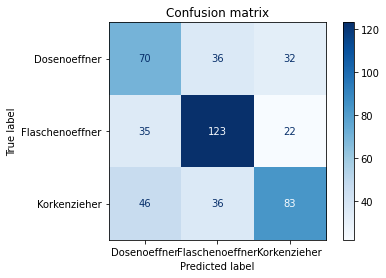

In [5]:
print(metrics.classification_report(y_test,y_pred))
np.set_printoptions(precision=2)
class_names=["Dosenoeffner","Flaschenoeffner","Korkenzieher"]


disp = ConfusionMatrixDisplay.from_estimator(
    gnb,
    X_test,
    y_test,
    display_labels=class_names,
    cmap=plt.cm.Blues,
    normalize=None,
)
disp.ax_.set_title("Confusion matrix")

print("Confusion matrix")
print(disp.confusion_matrix)